<a href="https://colab.research.google.com/github/IsmailHuseynov/Alzheimer-s_detection/blob/main/Alzheimer's_detection_Deep_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## About Dataset


**Alzheimer MRI Preprocessed Dataset (128 x 128)**

Dataset is taken from [Kaggle](https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset), in more detail:

* The Dataset is collected from several websites/hospitals/public repositories;
* The Dataset is consists of Preprocessed MRI (Magnetic Resonance Imaging) scans;
* All the images are resized into **128 x 128** pixels;
* The Dataset has **4** classes of images.
* The Dataset is consists of total **6400** MRI images.

  **Class - 1**: *Mild Demented* (**896** images)

  **Class - 2**: *Moderate Demented* (**64** images)

  **Class - 3**: *Non Demented* (**3200** images)

  **Class - 4**: *Very Mild Demented* (**2240** images)

This dataset is large and requires powerful hardware resources for efficient processing. **Google Colab** is a suitable platform for this purpose due to its access to powerful hardware resources. For this purpose, we can first upload the dataset with the images from **Kaggle** to **Google Drive**. To access your dataset in **Google Drive** from **Google Colab**, you need to mount your **Google Drive** as follows:

In [26]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This will prompt you to authorize **Google Colab** to access your **Google Drive**, and once you do that, you will be able to access your **Google Drive** files from **Google Colab**. After mounting your drive, you can navigate to the directory where your dataset is saved:

In [27]:
# Set the path to your dataset directory
data_dir = '/content/drive/MyDrive/dataset'

To prepare our dataset for training, we need to collect the file names of all the images in the dataset. This can be achieved using the `os` library.
The `os` library is used to list the files in a directory. `os.listdir()` and `os.walk()` are methods of the `os` library to get the name of each file and folder in a directory. `os.listdir()` method lists files and folders in a given directory. But, this method does not return anything within subfolders (subdirectories)(!)

Since we have **4** subfolders in a given directory, `os.listdir()` function will return us only the names of those subfolders, not the file names within each subfolder:

In [28]:
# import os module
import os

subfolders = os.listdir(data_dir)

for file in subfolders:
    print(file)
print(f"Number of subfolders: {len(subfolders)}")

Very_Mild_Demented
Mild_Demented
Non_Demented
Moderate_Demented
Number of subfolders: 4


Unlike `os.listdir()`, `os.walk()` function returns a list of every files in an entire file tree. `os.walk()` returns the name of every subfolder in a directory and any of its subdirectories. 

`os.walk()` generates a **3**-tuple (`root`, `dirs`, `files`) for each subdirectory in a directory tree, allowing you to recursively iterate through all the files and subdirectories in a directory and get information about each one:

* `root`: prints out *directories* from what you specified;
* `dirs`: prints out *sub-directories (subfolders)* from `root`;
* `files`: prints out all *files* from `root` and `dirs`.

In [29]:
all_files = os.walk(data_dir)

for root, dirs, files in all_files:
    print(f"root: {root}")
    print(f"directories: {dirs}")
    print(f"files: {files}")

root: /content/drive/MyDrive/dataset
directories: ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented', 'Moderate_Demented']
files: []
root: /content/drive/MyDrive/dataset/Very_Mild_Demented
directories: []
files: ['verymild_2107.jpg', 'verymild_211.jpg', 'verymild_2115.jpg', 'verymild_2098.jpg', 'verymild_2124.jpg', 'verymild_2122.jpg', 'verymild_2134.jpg', 'verymild_2123.jpg', 'verymild_2137.jpg', 'verymild_2130.jpg', 'verymild_2139.jpg', 'verymild_2131.jpg', 'verymild_2125.jpg', 'verymild_2127.jpg', 'verymild_2118.jpg', 'verymild_2126.jpg', 'verymild_2133.jpg', 'verymild_2128.jpg', 'verymild_2135.jpg', 'verymild_213.jpg', 'verymild_2129.jpg', 'verymild_2120.jpg', 'verymild_2138.jpg', 'verymild_2136.jpg', 'verymild_2132.jpg', 'verymild_212.jpg', 'verymild_2121.jpg', 'verymild_2119.jpg', 'verymild_2154.jpg', 'verymild_2148.jpg', 'verymild_2140.jpg', 'verymild_2156.jpg', 'verymild_2143.jpg', 'verymild_2145.jpg', 'verymild_2155.jpg', 'verymild_2150.jpg', 'verymild_2158.jpg', 'verymild

Then, you need to create an empty list `image_files` to hold all image file names. You can use `os.walk()` to recursively iterate through each subfolder and get a list of all image file names. For each file, you can check if it ends with the file extension of your image files (e.g. `.jpg` or `.png`) and if it does, we append the full file path to the `image_files` list using `os.path.join(root, file)`.



In [30]:
# Create an empty list to hold all image file names
image_files = []

# Recursively iterate through each subfolder and get a list of all image file names
for root, directories, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.jpg'):   # Change the file extension to match your images
            image_files.append(os.path.join(root, file))

Finally, you can print the number of files in the list of `image_files`:

In [ ]:
# Print the number of files in the list
print(f"The number of image files: {len(image_files)}")

The number of image files: 6400


# Image Preprocessing

The following script loads and preprocesses a set of images for use in a Machine Learning algorithm, making the data easier to work with and improving model performance:

* `cv2` is a popular **Computer Vision** library that provides a wide range of functions for working with *images* and *videos*;
* `numpy` is a library that provides support for working with *arrays* and *matrices*;
* Create two empty lists called `X` and `y` to store the preprocessed images and their corresponding labels.

Then the following loop goes through a set of image files, reads each image using `cv2.imread()`, converts it from the `BGR` color space to the `RGB` color space using `cv2.cvtColor()`, normalizes the pixel values so that they are between **0** and **1** by dividing by **255.0**, and stores the resulting image in the `X` list.

Meanwhile, the label for each image is extracted from the subfolder name by splitting the file path on the `'/'` character and taking the second-to-last element (since the last element is the image filename itself). This label is then stored in the `y` list.

Last two lines convert the `X` and `y` lists to `numpy` arrays, which makes them easier to work with in many Machine Learning algorithms. The resulting arrays can be used as input data and labels for training a model.


In [31]:
# import essential libraries
import cv2
import numpy as np


# Load and preprocess the images
X = []
y = []

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    img = img.astype('float32') / 255.0  # normalize pixel values to [0,1]
    X.append(img)
    label = file.split('/')[-2]  # get the label from the subfolder name
    y.append(label)

# Convert the lists to arrays
X = np.array(X)
y = np.array(y)



Then, we can demonstrate a sample image for each class. The following script serves this aim that selects **4** random images from each class in a given dataset, where the class labels are stored in `y` and the corresponding images are stored in `X`. It then creates a dictionary that stores the selected images for each class, and displays them using matplotlib. The code iterates through each class label, selects the corresponding images, and uses random sampling to select **4** random images. Finally, it creates a figure with **1** row and **4** columns of subplots, and displays the selected images in each subplot along with their corresponding class label:

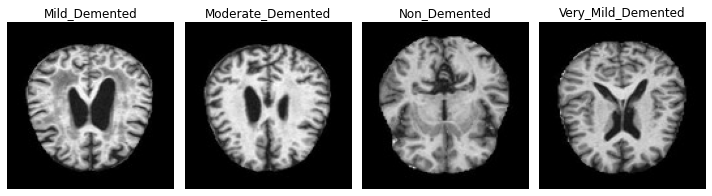

In [32]:
import random

# Get a list of unique class labels
classes = np.unique(y)

# Create a dictionary to hold the selected images for each class
selected_images = {}

# Iterate through each class and select 4 random images
for label in classes:
    class_images = X[y == label]
    selected = random.sample(list(class_images), 4)
    selected_images[label] = selected

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(10,10))
for i in range(4):
   axs[i].imshow(selected_images[classes[i]][0])
   axs[i].set_title(classes[i])
   axs[i].axis("off")

plt.tight_layout()
plt.show()

# Dataset Splitting

To split the dataset of preprocessed images into *training*, *validation*, and *testing* sets, you can use the `train_test_split` function from the `scikit-learn` library, as follows:


In [33]:
# Split the dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)



# Print the shape of each set
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape:', X_valid.shape, y_valid.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (5120, 128, 128, 3) (5120,)
Validation set shape: (640, 128, 128, 3) (640,)
Testing set shape: (640, 128, 128, 3) (640,)


The split ensures that the model is trained on a subset of the data, validated on another subset to tune hyperparameters, and tested on a final subset to evaluate performance, all while avoiding overfitting to any one set of images.

From the above result, `y_train` has shape `(5120,)`. This suggests that the training dataset contains **5120** images and `y_train` contains the corresponding target labels for each image. The fact that `y_train` is a one-dimensional array indicates that it is a vector rather than a matrix. However, we have **4** different classes for the target variable, namely:

`['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']`

 Therefore, the shape of `y_train` should be `(5120,4)`. This is a common issue in Machine Learning problems where we need to handle multi-class classification tasks.

To fix this issue, we will use *one-hot encoding*, which is a popular technique in multi-class classification problems. *One-hot encoding* involves converting the categorical target variable into a binary vector representation. In our case, we have **4** classes, so the one-hot encoded vector for each image will have **4** elements, with a value of **1** in the position corresponding to the correct class and **0**s in all other positions.

To apply *one-hot encoding*, we will use the following script:

In [34]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform them
y_train = label_encoder.fit_transform(y_train)

# Transform the validation labels
y_valid = label_encoder.transform(y_valid)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes=4)
y_valid = to_categorical(y_valid, num_classes=4)


Now,  the shapes of `y_train` and `y_valid` are `(5120,4)` and `(640,4)`, respectively:

In [35]:
# Print the shape of training and validation labels
print(f"Training set shape: {y_train.shape}")
print(f"Validation set shape: {y_valid.shape}")

Training set shape: (5120, 4)
Validation set shape: (640, 4)


# Model Building and Training

We will use the following script for the architecture of **Convolutional Neural Network (CNN)** model:

In [36]:
# import essential layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


img_height = 128
img_width = 128

# Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer="he_normal", input_shape = (img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model.add(MaxPooling2D())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))


## Compiling the Model

After building the **CNN** architecture, the next step is to compile the model. This step involves configuring the model for the training process. When we compile a model, we define its learning process and specify how its performance will be evaluated. In the following code snippet:

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

* `optimizer` is the optimization algorithm used to update the weights of the Neural Network during the training process. `adam` is one of the most popular optimization algorithms used in Deep Learning, as it is efficient and requires minimal memory requirements;

* `loss` is the objective function that the Neural Network tries to minimize during training. In this case, we use the categorical_crossentropy loss function, which is commonly used for multi-class classification problems;

* `metrics` is a list of evaluation metrics used to measure the performance of the model during training and testing. In this case, we use accuracy as the evaluation metric.

## Fitting the Model

Then we train the model using the `fit()` method, during which the model adjusts its weights to minimize the loss function and improve its performance on the training data. However, the model's performance on the validation data may not always improve with each epoch, and it's important to save the model with the best performance.

During the training of a Deep Learning model, the validation accuracy may fluctuate over the **50** epochs. However, the `ModelCheckpointcallback()` function can be used to save the best performing version of our model. In the following script, we create an instance of the ModelCheckpoint class and specify the file path to save the best performing model, the metric to monitor (in this case, the validation accuracy), and the mode to maximize the metric. By setting `save_best_only = True`, the callback only saves the the full model when its performance on the validation data is better than the previous best:

In [39]:
from tensorflow.keras.callbacks import  ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'model_kaggle_alzheimer.h5',
                                                save_weights_only = False,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only = True)
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), callbacks = [checkpoint], epochs = 50)

Epoch 1/50
160/160 [==============================] - 99s 610ms/step - loss: 1.3066 - accuracy: 0.5063 - val_loss: 0.9055 - val_accuracy: 0.5609
Epoch 2/50
160/160 [==============================] - 94s 590ms/step - loss: 0.8439 - accuracy: 0.6223 - val_loss: 0.7199 - val_accuracy: 0.7109
Epoch 3/50
160/160 [==============================] - 94s 587ms/step - loss: 0.5601 - accuracy: 0.7834 - val_loss: 0.4723 - val_accuracy: 0.8344
Epoch 4/50
160/160 [==============================] - 95s 598ms/step - loss: 0.3272 - accuracy: 0.8750 - val_loss: 0.2841 - val_accuracy: 0.8984
Epoch 5/50
160/160 [==============================] - 94s 590ms/step - loss: 0.2117 - accuracy: 0.9232 - val_loss: 0.3143 - val_accuracy: 0.8781
Epoch 6/50
160/160 [==============================] - 93s 579ms/step - loss: 0.1396 - accuracy: 0.9520 - val_loss: 0.2303 - val_accuracy: 0.9047
Epoch 7/50
160/160 [==============================] - 92s 574ms/step - loss: 0.0938 - accuracy: 0.9670 - val_loss: 0.1397 - val_ac

In [40]:
model = tf.keras.models.load_model('model_kaggle_alzheimer.h5')

In [42]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_valid, y_valid)

print(f"Validation loss: {round(loss,2)}")
print(f"Validation accuracy: {round(accuracy,2)}")

20/20 [==============================] - 3s 138ms/step - loss: 0.0480 - accuracy: 0.9906
Validation loss: 0.05
Validation accuracy: 0.99


We can demonstrate the performance of our CNN model during training by plotting the **accuracy score** and the **loss values** of the *training* dataset and *validation* dataset over time. This allows us to see how the model is learning and whether it generalizes well to new data.

For example, the first plot shows the **accuracy scores** of the *training* and *validation* datasets over 50 epochs. Both the **training accuracy** and the **validation accuracy** are tending towards 1, indicating that our model is learning well and improving its performance over time:

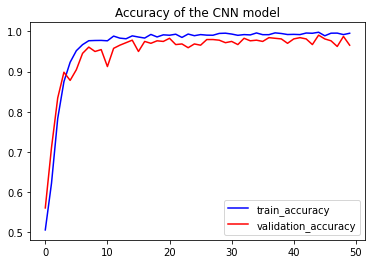

In [59]:
import matplotlib.pyplot as plt

# Plot the accuracy score of our model
plt.plot(history.history['accuracy'], c='b', label='train_accuracy')
plt.plot(history.history['val_accuracy'], c='r', label='validation_accuracy')
plt.title('Accuracy of the CNN model')
plt.legend()
plt.show()

Similarly, the second plot shows the **loss values** of the *training* and *validation* datasets over 50 epochs. Both the **training loss** and the **validation loss** are tending towards 0, indicating that our model is generalizing well to new data and is not overfitting:

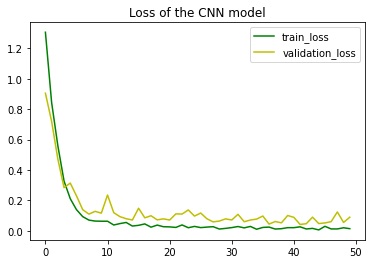

In [55]:
# Plot the loss value of our model
plt.plot(history.history['loss'], c='g', label='train_loss')
plt.plot(history.history['val_loss'], c='y', label='validation_loss')
plt.title('Loss of the CNN model')
plt.legend()
plt.show()


# Performance Analysis

To evaluate the performance of a classification model, it is important to use various metrics. However, before analyzing the model's performance, we must first convert the class labels from their one-hot encoded format to an integer format.

In multi-class classification problems, class labels are often represented in a one-hot encoded format. We can use the `np.argmax()` function to convert these labels to an integer format. This function takes a one-hot encoded label vector and returns the index of the element with the highest value, which corresponds to the class label for that input data.

Therefore, in our multi-class classification problem, when working with one-hot encoded label matrices such as `y_valid` or `y_pred`, we will use the `np.argmax()` function with the `axis=1` parameter to obtain an array of integer labels. By applying `np.argmax()` to the label matrix in this way, we can obtain an array of integer labels that can be used to evaluate the performance of the classification model using various metrics, such as **accuracy**, **precision**, **recall** and **F1-score**.

The **accuracy score**, which represents the percentage of correctly classified images among all images in a dataset, is one of the most commonly used performance metrics. To calculate the **accuracy score** of a classification model in Python, we can use the following code snippet:

In [56]:
# Import the accuracy score function
from sklearn.metrics import accuracy_score

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Calculate the accuracy
acc = accuracy_score(y_true, y_pred_classes)

print(f"Accuracy score of the model: {round(acc, 2)}")

20/20 [==============================] - 3s 147ms/step
Accuracy score of the model: 0.99


The output of **99%** **accuracy score** may appear excellent, but it can be misleading in the case of *imbalanced* datasets, like our image dataset. In such scenarios, other metrics like **precision**, **recall**, and **F1-score** should be used in conjunction with the accuracy score to gain a better understanding of the model's performance.

**Precision** measures what proportion of positive predictions are correct, while **recall** measures what proportion of actual positives are correctly predicted by the model. **F1-score** is the harmonic mean of **precision** and **recall** that measures the balance between these metrics.
Moreover, **F1-score** is a useful metric when you want to balance **precision** and **recall**, particularly in cases where the classes are *imbalanced*.

The **confusion matrix** is a powerful tool that enables the computation of various performance metrics such as **precision**, **recall**, and **F1-score** that are used to evaluate the effectiveness of a classification model. These metrics are calculated by analyzing the **confusion matrix**, which shows how many images were correctly or incorrectly classified for each class.

To obtain the **confusion matrix** for a multi-class classification model in Python, we can use the `confusion_matrix` function from `sklearn.metrics` module. Here is a code snippet:

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print(confusion_mtx)


20/20 [==============================] - 3s 145ms/step
[[ 86   0   0   1]
 [  0   4   0   0]
 [  0   0 314   2]
 [  1   0   2 230]]


To demonstrate the **confusion matrix**, we can use the `confusion_matrix` function from `sklearn.metrics` module with the help of `seaborn` library:

20/20 [==============================] - 5s 238ms/step


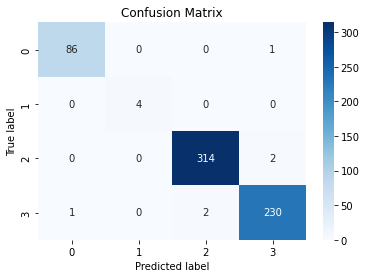

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


# Plot the heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')#"YlGnBu")

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Further, to create a **heatmap** with class names, we first need to define the `class_name`s variable, which contains a list of labels that correspond to each class in our data. Once we have `class_names`, we can plot the **heatmap** and add the class names as tick labels using the `xticklabels=class_names` and `yticklabels=class_names` parameters, respectively. Here's an example code snippet that demonstrates this:

20/20 [==============================] - 5s 256ms/step


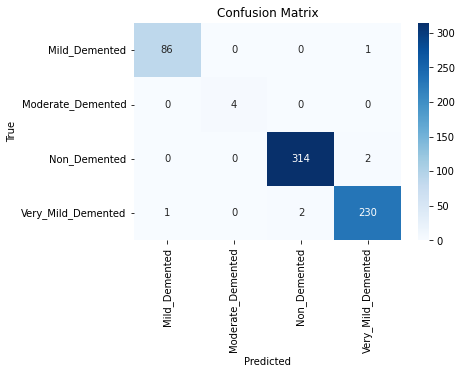

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


By analyzing the **confusion matrix**, we can determine the number of **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)** for each class. Then, we can calculate **accuracy**, **precision**, **recall**, and **F1-score** for each class using the following formulas by manually:

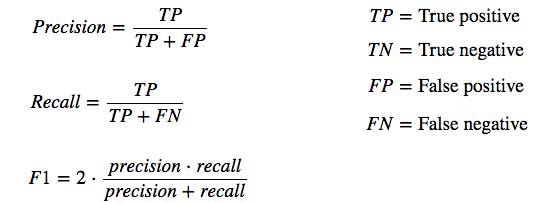

To evaluate **precision**, **recall**, and **F1-score** for each class in our multi-class classification problem using **Python** (*in automatic*), we can use the **classification report** which is a performance evaluation metric in Machine Learning. To do this, we can use the `classification_report()` function from the scikit-learn library. This report provides a comprehensive evaluation of the model’s performance on each class, including **precision**, **recall**, **F1-score**, and **support** (the number of images in each class). The **classification report** also returns the overall **accuracy score** of the model. Here is a code snippet of how to use it:

In [51]:
from sklearn.metrics import classification_report


# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Get the classification report
class_report = classification_report(y_true, y_pred_classes, target_names = class_names)

# Print the classification report
print(class_report)

20/20 [==============================] - 4s 218ms/step
                    precision    recall  f1-score   support

     Mild_Demented       0.99      0.99      0.99        87
 Moderate_Demented       1.00      1.00      1.00         4
      Non_Demented       0.99      0.99      0.99       316
Very_Mild_Demented       0.99      0.99      0.99       233

          accuracy                           0.99       640
         macro avg       0.99      0.99      0.99       640
      weighted avg       0.99      0.99      0.99       640



In the above output, the **precision**, **recall**, **F1-score** and **support** for each class (*Mild Demented*, *Moderate Demented*, *Non Demented*, *Very Mild Demented*) are shown in the first four rows. The last row shows the overall **accuracy score** for the model, while the two rows in between provide the **macro** and **weighted averages** **of precision, recall,** and **F1-score** across all classes.